<a href="https://colab.research.google.com/github/the-ml-bull/Hello_World/blob/main/01_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
from datetime import datetime 

url = 'https://raw.githubusercontent.com/the-ml-bull/Hello_World/main/Fx60.csv'
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M')

df = pd.read_csv(url, parse_dates=['date'], date_parser=dateparse)

df.head(n=10)


,ix,date,fill_type,audusd_open,audusd_high,audusd_low,audusd_close,audusd_volume,eurusd_open,eurusd_high,eurusd_low,eurusd_close,eurusd_volume
0,0,2015-01-02 10:00:00,given,0.81382,0.81450,0.81366,0.81427,4259.0,1.20554,1.20690,1.20443,1.20467,4626.0
1,1,2015-01-02 11:00:00,given,0.81431,0.81449,0.81353,0.81413,4231.0,1.20467,1.20600,1.20385,1.20573,4787.0
2,2,2015-01-02 12:00:00,given,0.81416,0.81422,0.81261,0.81303,3791.0,1.20574,1.20574,1.20418,1.20503,3276.0
3,3,2015-01-02 13:00:00,given,0.81302,0.81321,0.81152,0.81182,3897.0,1.20503,1.20577,1.20443,1.20535,3441.0
4,4,2015-01-02 14:00:00,given,0.81186,0.81197,0.81071,0.81111,3648.0,1.20531,1.20542,1.20347,1.20377,3323.0
5,5,2015-01-02 15:00:00,given,0.81111,0.81140,0.81052,0.81075,3464.0,1.20377,1.20437,1.20250,1.20302,3897.0
6,6,2015-01-02 16:00:00,given,0.81072,0.81092,0.81011,0.81066,3758.0,1.20301,1.20330,1.20082,1.20144,4494.0
7,7,2015-01-02 17:00:00,given,0.81081,0.81251,0.81081,0.81248,5296.0,1.20146,1.20315,1.20114,1.20307,6169.0
8,8,2015-01-02 18:00:00,given,0.81249,0.81309,0.81142,0.81162,4136.0,1.20309,1.20312,1.20069,1.20131,4600.0
9,9,2015-01-02 19:00:00,given,0.81162,0.81184,0.81070,0.81114,3008.0,1.20133,1.20154,1.20035,1.20092,3005.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 1.6 MB/s eta 0:00:00


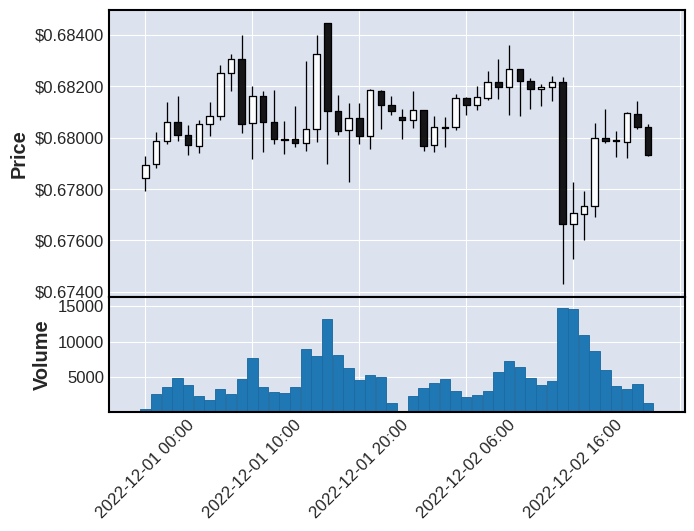

In [ ]:
!pip install mplfinance
import mplfinance as mpf

# create DF and copy values from main df 
mpf_df = pd.DataFrame()
mpf_df[['date', 'Open', 'High', 'Low', 'Close', 'Volume']] = df[['date', 'audusd_open', 'audusd_high', 'audusd_low', 'audusd_close', 'audusd_volume']].to_numpy()

# set index to datetime index date 
mpf_df['date'] = pd.to_datetime(mpf_df['date'])
mpf_df = mpf_df.set_index('date')

# set OHLC as float 
mpf_df = mpf_df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)

# Chart 
#mpf.plot(mpf_df, volume=True, datetime_format='%Y', type='line')

from matplotlib.ticker import FormatStrFormatter
fig, axlist = mpf.plot(mpf_df['2022-12-01':'2022-12-02'], volume=True, datetime_format='%Y-%m-%d %H:%M', type='candle', returnfig=True)
axlist[0].yaxis.set_major_formatter(FormatStrFormatter('$%.5f'))
mpf.show()

In [ ]:
import numpy as np

df = df[['date', 'audusd_open', 'audusd_close']].copy()

# x is the last 4 values so create x for each 
df['x_t4'] = df['audusd_close'].shift(4)
df['x_t3'] = df['audusd_close'].shift(3)
df['x_t2'] = df['audusd_close'].shift(2)
df['x_t1'] = df['audusd_close'].shift(1)

# y is points 4 periods into the future - the open price now (not close)
df['y_future'] = df['audusd_close'].shift(-3)
df['y_change_price'] = df['y_future'] - df['audusd_open']
df['y_change_points'] = df['y_change_price'] * 100000 
df['y'] = np.where(df['y_change_points'] >= 200, 1, 0)

df.head(n=30)


,date,audusd_open,audusd_close,x_t4,x_t3,x_t2,x_t1,y_future,y_change_price,y_change_points,y
0,2015-01-02 10:00:00,0.81382,0.81427,NaN,NaN,NaN,NaN,0.81182,-0.00200,-200.0,0
1,2015-01-02 11:00:00,0.81431,0.81413,NaN,NaN,NaN,0.81427,0.81111,-0.00320,-320.0,0
2,2015-01-02 12:00:00,0.81416,0.81303,NaN,NaN,0.81427,0.81413,0.81075,-0.00341,-341.0,0
3,2015-01-02 13:00:00,0.81302,0.81182,NaN,0.81427,0.81413,0.81303,0.81066,-0.00236,-236.0,0
4,2015-01-02 14:00:00,0.81186,0.81111,0.81427,0.81413,0.81303,0.81182,0.81248,0.00062,62.0,0
5,2015-01-02 15:00:00,0.81111,0.81075,0.81413,0.81303,0.81182,0.81111,0.81162,0.00051,51.0,0
6,2015-01-02 16:00:00,0.81072,0.81066,0.81303,0.81182,0.81111,0.81075,0.81114,0.00042,42.0,0
7,2015-01-02 17:00:00,0.81081,0.81248,0.81182,0.81111,0.81075,0.81066,0.81073,-0.00008,-8.0,0
8,2015-01-02 18:00:00,0.81249,0.81162,0.81111,0.81075,0.81066,0.81248,0.81129,-0.00120,-120.0,0
9,2015-01-02 19:00:00,0.81162,0.81114,0.81075,0.81066,0.81248,0.81162,0.80959,-0.00203,-203.0,0


In [ ]:
from sklearn.linear_model import LogisticRegression   

x = df[['x_t4', 'x_t3', 'x_t2', 'x_t1']]
y = df['y']

# create train and val datasets.  Note Fx "follows" (time series) so randomization is NOT a good idea
no_train_samples = int(len(x) * 0.7)
x_train = x.iloc[4:no_train_samples]
y_train = y.iloc[4:no_train_samples]
x_val = x.iloc[no_train_samples:-3]
y_val = y.iloc[no_train_samples:-3]


In [ ]:
# fit the model 
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import log_loss, confusion_matrix, precision_score, recall_score, f1_score

# predict from teh val set meas we have predictions and true values as binaries  
y_pred = lr.predict(x_val)

#basic error types 
log_loss_error = log_loss(y_val, y_pred)
score = lr.score(x_val, y_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
precision = precision_score(y_val, y_pred, zero_division=0)
recall = recall_score(y_val, y_pred, zero_division=0)
f1 = f1_score(y_val, y_pred, zero_division=0)

# output the errors 
print('Errors Loss: {:.4f}'.format(log_loss_error))
print('Errors Score: {:.2f}%'.format(score*100))
print('Errors tp: {}'.format(tp))
print('Errors fp: {}'.format(fp))
print('Errors tn: {}'.format(tn))
print('Errors fn: {}'.format(fn))
print('Errors Precision: {:.2f}%'.format(precision*100))
print('Errors Recall: {:.2f}%'.format(recall*100))
print('Errors F1: {:.2f}'.format(f1))


Errors Loss: 4.4680
Errors Score: 87.60%
Errors tp: 0
Errors fp: 0
Errors tn: 13279
Errors fn: 1879
Errors Precision: 0.00%
Errors Recall: 0.00%
Errors F1: 0.00
